In [ ]:
# pip install tensorflow==2.12

In [ ]:
# pip install keras==2.12

In [ ]:
# pip uninstall keras

In [ ]:
# pip uninstall tensorflow

In [1]:
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier, EasyEnsembleClassifier
import numpy as np
import tensorflow as tf
import keras
import sklearn
from keras import layers
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
import random
from keras.models import clone_model
import copy
from google.colab import drive
import tarfile
import pandas as pd
from datetime import datetime, timedelta
import pickle
import matplotlib.pyplot as plt
import random
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
import networkx as nx
import random
from collections import deque
import statistics
import time
from scipy.stats import ks_2samp
import pickle

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Step 1: Import required libraries
from keras import backend as K

# Step 2: Configure TensorFlow to use GPU
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)
K.set_session(session)

AttributeError: ignored

In [ ]:
# import tensorflow as tf

# # Create a TensorFlow session config
# config = tf.compat.v1.ConfigProto()
# config.gpu_options.allow_growth = True

# # Create a TensorFlow session with the specified config
# session = tf.compat.v1.Session(config=config)

# # Set the session as the default session in TensorFlow
# tf.compat.v1.keras.backend.set_session(session)


In [ ]:
# with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/df_acorn_e.pkl', 'rb') as file:
#     df_acorn_e= pickle.load(file)

with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/df_cluster_4.pkl', 'rb') as file:
    df_cluster_4= pickle.load(file)

# with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/df_processing2.pkl', 'rb') as file:
#     df_processing2= pickle.load(file)

In [ ]:
def huber_loss(y_true, y_pred, delta=0.1):
    error = y_true - y_pred
    is_small_error = tf.abs(error) <= delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(is_small_error, squared_loss, linear_loss)

def smape_loss(y_true, y_pred):
    numerator = tf.abs(y_true - y_pred)
    denominator = tf.abs(y_true) + tf.abs(y_pred)
    return tf.reduce_mean(numerator / denominator)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_c32_ws_graph_k4_p0.3_esI_none_b100_f1_client_random_seed_0_monitor_mae', 'rb') as file:
  server_WS_0 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_c32_ba_graph_m3_esI_none_b100_f1_client_random_seed_0_monitor_mae', 'rb') as file:
  server_BA_0 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_c32_fullconnect_esI_none_b100_f1_client_random_seed_0_monitor_mae', 'rb') as file:
  server_FC_0 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_c32_ring_graph_esI_none_b100_f1_client_random_seed_0_monitor_mae', 'rb') as file:
  server_R_0 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_none_b100_f1_client_random_seed_0_monitor_mae', 'rb') as file:
  server_local_0 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_overall_none_b100_f1__client_random_seed_0_monitor_mae', 'rb') as file:
  server_overall_0 = pickle.load(file)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_c32_ws_graph_k4_p0.3_esI_none_b100_f1_client_random_seed_1_monitor_mae', 'rb') as file:
  server_WS_1 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_c32_ba_graph_m3_esI_none_b100_f1_client_random_seed_1_monitor_mae', 'rb') as file:
  server_BA_1 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_c32_fullconnect_esI_none_b100_f1_client_random_seed_1_monitor_mae', 'rb') as file:
  server_FC_1 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_c32_ring_graph_esI_none_b100_f1_client_random_seed_1_monitor_mae', 'rb') as file:
  server_R_1 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_none_b100_f1_client_random_seed_1_monitor_mae', 'rb') as file:
  server_local_1 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_overall_none_b100_f1__client_random_seed_1_monitor_mae', 'rb') as file:
  server_overall_1 = pickle.load(file)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_c32_ws_graph_k4_p0.3_esI_none_b100_f1_client_random_seed_2_monitor_mae', 'rb') as file:
  server_WS_2 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_c32_ba_graph_m3_esI_none_b100_f1_client_random_seed_2_monitor_mae', 'rb') as file:
  server_BA_2 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_c32_fullconnect_esI_none_b100_f1_client_random_seed_2_monitor_mae', 'rb') as file:
  server_FC_2 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_c32_ring_graph_esI_none_b100_f1_client_random_seed_2_monitor_mae', 'rb') as file:
  server_R_2 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_none_b100_f1_client_random_seed_2_monitor_mae', 'rb') as file:
  server_local_2 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_overall_none_b100_f1__client_random_seed_2_monitor_mae', 'rb') as file:
  server_overall_2 = pickle.load(file)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_c32_ws_graph_k4_p0.3_esI_none_b100_f1_client_random_seed_3_monitor_mae', 'rb') as file:
  server_WS_3 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_c32_ba_graph_m3_esI_none_b100_f1_client_random_seed_3_monitor_mae', 'rb') as file:
  server_BA_3 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_c32_fullconnect_esI_none_b100_f1_client_random_seed_3_monitor_mae', 'rb') as file:
  server_FC_3 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_c32_ring_graph_esI_none_b100_f1_client_random_seed_3_monitor_mae', 'rb') as file:
  server_R_3 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_none_b100_f1_client_random_seed_3_monitor_mae', 'rb') as file:
  server_local_3 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_overall_none_b100_f1__client_random_seed_3_monitor_mae', 'rb') as file:
  server_overall_3 = pickle.load(file)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_c32_ws_graph_k4_p0.3_esI_none_b100_f1_client_random_seed_4_monitor_mae', 'rb') as file:
  server_WS_4 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_c32_ba_graph_m3_esI_none_b100_f1_client_random_seed_4_monitor_mae', 'rb') as file:
  server_BA_4 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_c32_fullconnect_esI_none_b100_f1_client_random_seed_4_monitor_mae', 'rb') as file:
  server_FC_4 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_c32_ring_graph_esI_none_b100_f1_client_random_seed_4_monitor_mae', 'rb') as file:
  server_R_4 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_none_b100_f1_client_random_seed_4_monitor_mae', 'rb') as file:
  server_local_4 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_overall_none_b100_f1__client_random_seed_4_monitor_mae', 'rb') as file:
  server_overall_4 = pickle.load(file)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_c32_ws_graph_k4_p0.3_esI_none_b100_f1_client_random_seed_5_monitor_mae', 'rb') as file:
  server_WS_5 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_c32_ba_graph_m3_esI_none_b100_f1_client_random_seed_5_monitor_mae', 'rb') as file:
  server_BA_5 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_c32_fullconnect_esI_none_b100_f1_client_random_seed_5_monitor_mae', 'rb') as file:
  server_FC_5 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_c32_ring_graph_esI_none_b100_f1_client_random_seed_5_monitor_mae', 'rb') as file:
  server_R_5 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_none_b100_f1_client_random_seed_5_monitor_mae', 'rb') as file:
  server_local_5 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_overall_none_b100_f1__client_random_seed_5_monitor_mae', 'rb') as file:
  server_overall_5 = pickle.load(file)

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_c32_ws_graph_k4_p0.3_esI_none_b100_f1_client_random_seed_6_monitor_mae', 'rb') as file:
  server_WS_6 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_c32_ba_graph_m3_esI_none_b100_f1_client_random_seed_6_monitor_mae', 'rb') as file:
  server_BA_6 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_c32_fullconnect_esI_none_b100_f1_client_random_seed_6_monitor_mae', 'rb') as file:
  server_FC_6 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_c32_ring_graph_esI_none_b100_f1_client_random_seed_6_monitor_mae', 'rb') as file:
  server_R_6 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_none_b100_f1_client_random_seed_6_monitor_mae', 'rb') as file:
  server_local_6 = pickle.load(file)
with open('/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_overall_none_b100_f1__client_random_seed_6_monitor_mae', 'rb') as file:
  server_overall_6 = pickle.load(file)

In [ ]:

# selecting random num_clients out of total cleints (643 for acorn-e and 298 for cluster_4)
df_data = df_cluster_4
# df_data = df_processing2
random.seed(3)
num_clients = 32
sampled_ids = random.sample(df_data.LCLid.unique().tolist(),num_clients)
sampled_ids.sort()

df = df_data[df_data.LCLid.isin(sampled_ids)].sort_values(['LCLid','DateTime']).reset_index(drop = True)
df['Acorn_codes'] = df.Acorn.astype('category').cat.codes

# Create a dictionary to map LCLid to integer
lclid_map = {lclid: i for i, lclid in enumerate(sampled_ids)}

# Create the 'id' column using the mapping
df['id'] = df['LCLid'].map(lclid_map)

df.head(1)

,LCLid,stdorToU,DateTime,load,Acorn,Weekday,Hour,apparentTemperature,AVG4D,TempCluster,Acorn_codes,id
0,MAC000179,Std,2013-01-01,0.18,ACORN-E,1,0,3.66,0.18,0,2,0


In [ ]:
FC = [server_FC_0,server_FC_1,server_FC_2,server_FC_3,server_FC_4,server_FC_5,server_FC_6]
BA = [server_BA_0,server_BA_1,server_BA_2,server_BA_3,server_BA_4,server_BA_5,server_BA_6]
WS = [server_WS_0,server_WS_1,server_WS_2,server_WS_3,server_WS_4,server_WS_5,server_WS_6]
R = [server_R_0,server_R_1,server_R_2,server_R_3,server_R_4,server_R_5,server_R_6]

In [ ]:
num_clients = 32
RMSE = []
MAPE = []
MAE = []
for idx in range(num_clients):
  print(idx)
  client = server_WS_3.network[idx]
  # y_true = client.y_test
  # y_pred = client.model.predict(client.x_test).T[0]
  client.model.compile(optimizer='adam', loss='mae', metrics=[keras.metrics.RootMeanSquaredError(),"mean_absolute_percentage_error"])
  RMSE.append(client.model.evaluate(client.x_test,client.y_test,verbose = 0)[1])
  MAPE.append(client.model.evaluate(client.x_test,client.y_test,verbose = 0)[2])
  MAE.append(client.model.evaluate(client.x_test,client.y_test,verbose = 0)[0])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


In [ ]:
num_clients = 32
RMSE2 = []
MAPE2 = []
MAE2 = []
for idx in range(num_clients):
  print(idx)
  client = server_local_3.network[idx]
  # y_true = client.y_test
  # y_pred = client.model.predict(client.x_test).T[0]
  client.model.compile(optimizer='adam', loss='mae', metrics=[keras.metrics.RootMeanSquaredError(),"mean_absolute_percentage_error"])
  MAE2.append(client.model.evaluate(client.x_test,client.y_test,verbose = 0)[0])
  RMSE2.append(client.model.evaluate(client.x_test,client.y_test,verbose = 0)[1])
  MAPE2.append(client.model.evaluate(client.x_test,client.y_test,verbose = 0)[2])
  # MAE2.append(MAE(y_true,y_pred))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


In [ ]:
# non-benefitting clients figuring it out
# num_clients = 32
# RMSE2 = []
# MAPE2 = []
# MAE2 = []
# for i in server_R_3_nb.network:
#   print(i.id)
#   for j in server_local_3.network:
#     if i.x_train[0][0][0] == j.x_train[0][0][0]:
#       client=j
#       break

#   # client = server_local_2.network[idx]
#   # y_true = client.y_test
#   # y_pred = client.model.predict(client.x_test).T[0]
#   client.model.compile(optimizer='adam', loss='mae', metrics=[keras.metrics.RootMeanSquaredError(),"mean_absolute_percentage_error"])
#   MAE2.append(client.model.evaluate(client.x_test,client.y_test,verbose = 0)[0])
#   RMSE2.append(client.model.evaluate(client.x_test,client.y_test,verbose = 0)[1])
#   MAPE2.append(client.model.evaluate(client.x_test,client.y_test,verbose = 0)[2])
#   # MAE2.append(MAE(y_true,y_pred))

In [ ]:
RMSE = np.array(RMSE)
RMSE2 = np.array(RMSE2)
MAPE = np.array(MAPE)
MAPE2 = np.array(MAPE2)
MAE = np.array(MAE)
MAE2 = np.array(MAE2)

In [ ]:
# with specified network
print(np.mean(MAE))
print(np.mean(RMSE))
print(np.mean(MAPE))

0.10344980587251484
0.19068562611937523
42.639265060424805


In [ ]:
# local household
print(np.mean(MAE2))
print(np.mean(RMSE2))
print(np.mean(MAPE2))

0.11839314486132935
0.2141907021868974
48.81831622123718


In [ ]:
mae_diff = MAE2-MAE
# np.mean(mae_diff)

In [ ]:
rmse_diff = RMSE2-RMSE
# np.mean(rmse_diff)

In [ ]:
mape_diff = MAPE2-MAPE
# np.mean(mape_diff)

In [ ]:
# num benefitting clients
sum(MAPE<MAPE2)

24

In [ ]:
np.argsort(MAPE2-MAPE)

array([17, 19, 13, 31, 28, 23,  7, 22, 14, 24,  3, 25,  9,  5, 27,  6,  1,
       29, 26,  0, 10, 12, 16, 18,  4, 11, 20,  2, 15, 30,  8, 21])

In [ ]:
non_benefit = np.argsort(MAPE2-MAPE)[0:num_clients-sum(MAPE<MAPE2)]

In [ ]:
# list of non benefitting clients
non_benefit.sort(0)
non_benefit

array([ 7, 13, 17, 19, 22, 23, 28, 31])

In [ ]:
#mape improv
np.mean([mape_diff[i] for i in range(num_clients) if i not in non_benefit])

9.883499383926392

In [ ]:
#mae improv
np.mean([mae_diff[i] for i in range(num_clients) if i not in non_benefit])

0.014526078089450797

In [ ]:
#rmse improv
np.mean([rmse_diff[i] for i in range(num_clients) if i not in non_benefit])

0.01844054600223899

In [ ]:
MAPE2-MAPE

array([  8.81480408,   7.15621567,  12.97685051,   1.66763306,
        12.23593903,   4.54570389,   6.91633987,  -1.25833511,
        24.5871582 ,   4.31201172,   9.91304016,  12.42614365,
        10.44882965,  -6.40048409,   0.63273621,  15.57172394,
        11.23557663, -12.1783905 ,  11.39452362, -10.02923965,
        12.44291306,  26.34872055,  -0.2195282 ,  -1.45630646,
         1.41506386,   2.68870544,   7.60538101,   4.95737076,
        -2.68296051,   7.35799599,  19.55260468,  -5.24910355])

In [ ]:
#time
# print(server_local_6.run_time)
# print(server_FC_6.run_time/60)
# print(server_BA_6.run_time/60)
# print(server_WS_6.run_time/60)
# print(server_R_6.run_time/60)

In [ ]:
server_WS_3.run_time/60

59.33864638408025

In [ ]:
fig,ax = plt.subplots()
ax.plot(server_FC_1.history['val_mae'],linewidth = 2)
ax.plot(server_BA_1.history['val_mae'],linewidth = 2)
ax.plot(server_WS_1.history['val_mae'],linewidth = 2)
ax.plot(server_R_1.history['val_mae'],linewidth = 2)
ax.legend(['Fully Connected','Scale-Free (Barabasi-Albert)','Small-Scale (Wattz-Strogatz)','Ring'])
ax.grid()
ax.set_xticks([i*5 for i in range(8)])
ax.set_xticklabels([str(i) for i in [i*5 for i in range(8)]], fontsize=10, fontweight='bold')
ax.set_yticks([0.1,0.11,0.12,0.13,0.14,0.15])
ax.set_yticklabels([str(i) for i in [0.1,0.11,0.12,0.13,0.14,0.15]], fontsize=10, fontweight='bold')

# Customize the x-axis label
ax.set_xlabel('Epochs', fontsize=12, fontweight='bold')
ax.set_ylabel('Validation Loss (MAE)', fontsize=12, fontweight='bold')
# ax.grid()

In [ ]:

print(server_FC_6.run_time/60)
print(server_BA_6.run_time/60)
print(server_WS_6.run_time/60)
print(server_R_6.run_time/60)

# FEATURE VECTOR CONSTRUCTION

In [ ]:
non_benefitting_clients = {}
non_benefitting_clients[0]=[0, 7, 10, 15, 16, 20, 24, 27]
non_benefitting_clients[1]=[1, 3, 4, 11, 15, 25, 27, 31]
non_benefitting_clients[2]=[19, 22, 24, 31]
non_benefitting_clients[3]=[3, 17, 19, 31]
non_benefitting_clients[4]=[0, 1, 16, 18, 26, 29, 30]
non_benefitting_clients[5]=[0, 4, 10, 15, 19, 21, 26]

non_benefitting_clients[6]=[0, 5,  7,  9, 10, 19, 24, 26, 27]
non_benefitting_clients[7]=[21,1,27,2]#[1,  3,  8,  9, 12, 13, 14, 19, 20, 21, 25, 27]
non_benefitting_clients[8]=[0, 10, 20, 24, 27, 29]

non_benefitting_clients[9]=[2,  4,  8, 11, 13, 14, 16, 18, 21, 25, 27, 30, 31]
non_benefitting_clients[10]=[ 7,  8,  9, 11, 17, 26, 29]
non_benefitting_clients[11]=[ 2,  3,  4,  7, 10, 12, 15, 19, 22, 24, 25, 27, 30]
non_benefitting_clients[12] = [0,  3,  8, 10, 11, 13, 14, 16, 17, 18, 20, 23, 24, 26]
non_benefitting_clients[13] = [5,  7,  8, 11, 15, 17, 25, 27, 28, 30, 31]


Random Forest

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import imblearn
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
# FEATURE VECTOR CONSTRUCTION
def get_feature_vector(random_seed, non_benefitting_clients,df_cluster_4,d=0):
  df_data = df_cluster_4
  random.seed(random_seed)
  num_clients = 32
  sampled_ids = random.sample(df_data.LCLid.unique().tolist(),num_clients)
  sampled_ids.sort()

  df = df_data[df_data.LCLid.isin(sampled_ids)].sort_values(['LCLid','DateTime']).reset_index(drop = True)
  df['Acorn_codes'] = df.Acorn.astype('category').cat.codes

  # Create a dictionary to map LCLid to integer
  lclid_map = {lclid: i for i, lclid in enumerate(sampled_ids)}

  # Create the 'id' column using the mapping
  df['id'] = df['LCLid'].map(lclid_map)

  def iqr(x):
      return x.quantile(0.75) - x.quantile(0.25)

  # df_k_means = df[['LCLid','load']].groupby(['LCLid']).agg(['mean','median','max','min','std',iqr,'sum',lambda x: x.max() - x.min()])
  # df_k_means = df[['LCLid','load']].groupby(['LCLid']).agg(['mean','median','std',iqr,lambda x: x.max() - x.min()])
  df_k_means = df[['LCLid','load']].groupby(['LCLid']).agg(['mean','median','std',iqr])


  df_k_means = df_k_means.droplevel(level=0, axis=1)

  grouped_df = df.groupby(['LCLid', 'Weekday'])['load'].mean().reset_index()
  min_load_indexes = grouped_df.groupby('LCLid')['load'].idxmin()
  max_load_indexes = grouped_df.groupby('LCLid')['load'].idxmax()

  min_load_df = grouped_df.loc[min_load_indexes]
  max_load_df = grouped_df.loc[max_load_indexes]

  min_load_df = min_load_df.rename(columns={'Weekday': 'Weekday_min'})
  max_load_df = max_load_df.rename(columns={'Weekday': 'Weekday_max'})

  result_df = pd.merge(min_load_df[['LCLid', 'Weekday_min']],
                      max_load_df[['LCLid', 'Weekday_max']],
                      on='LCLid')

  # df_k_means = pd.merge(df_k_means, result_df, on='LCLid')
  df_k_means = pd.merge(df_k_means, df[['LCLid','id']].drop_duplicates(), on='LCLid')
  df_k_means.rename(columns={'<lambda_0>': 'range'}, inplace=True)

  df_k_means['benefit']=0
  df_k_means.loc[df_k_means.id.isin(non_benefitting_clients),'benefit']=1
  # from sklearn.cluster import KMeans
  # data_for_clustering = df_k_means[df_k_means.columns[1:-1]].values
  # num_clusters = 2
  # kmeans = KMeans(n_clusters=num_clusters, random_state=0)
  # cluster_labels = kmeans.fit_predict(data_for_clustering)
  # df_k_means['cluster_label'] = cluster_labels
  # df_k_means
  if d==1:
    display(df_k_means.head(2))

  data = df_k_means.values[:,1:-2]
  mean_vector = np.mean(data, axis=(0), keepdims=True)
  std_vector = (np.mean(np.square(data-mean_vector), axis=(0), keepdims=True))**0.5
  return (data-mean_vector)/std_vector, df_k_means['benefit'].values

In [ ]:
x,y =  get_feature_vector(0,non_benefitting_clients[0],df_cluster_4,d=1)
print(np.shape(x))
print(np.shape(y))

,LCLid,mean,median,std,iqr,id,benefit
0,MAC000368,0.125733,0.076,0.116200,0.08500,0,1
1,MAC000746,0.291819,0.203,0.274725,0.21825,1,0


(32, 4)
(32,)


Training

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve
from sklearn.metrics import make_scorer, f1_score, classification_report
import xgboost as xgb
from sklearn.svm import SVC

X = np.empty((0,4))
Y = np.empty((0,))
for seed in range(13):
  x,y =  get_feature_vector(seed,non_benefitting_clients[seed],df_cluster_4)
  X = np.concatenate((X,x))
  Y = np.concatenate((Y,y))

X_train = X
y_train = Y

# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X, Y)

# Create a RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=800, random_state=42,class_weight="balanced_subsample",max_depth = 4, oob_score = True)
# clf_rf = BalancedBaggingClassifier(n_estimators=800, oob_score = True,random_state = 42,sampling_strategy = 1,replacement=True )
# clf_rf = BalancedRandomForestClassifier(n_estimators=800, oob_score = True,random_state = 42)
# clf = EasyEnsembleClassifier(n_estimators=800,random_state=42,replacement=True)
# clf = xgb.XGBClassifier(random_state=42)
# clf_rf = SVC(C = 0.2,gamma='auto',probability = True,random_state = 42,class_weight='balanced')

# Fit the model to the training data
clf_rf.fit(X_train, y_train)
# clf_rf.fit(X_train, y_train)
# clf = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=2)
# Fit the model, test sets are used for early stopping.
# clf.fit(X_train, y_train, eval_set=[(X_test, y_test)])



# Make predictions on the testing data
# y_pred = clf.predict(X_train)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
# evaluate model
f1_scorer = make_scorer(f1_score)
# scores = cross_val_score(clf, X, Y, scoring=f1_scorer, cv=cv, n_jobs=-1)

# scores = cross_val_score(clf, X, Y, scoring='average_precision', cv=cv, n_jobs=-1)

# scores = cross_val_score(clf, X, Y, scoring='roc_auc', cv=cv, n_jobs=-1)
# print(np.mean(scores))
# print(clf.oob_score_)
# np.mean(scores)
# Visualize the first tree in the forest
# feature_names = ['a','b','c','d']
# plt.figure(figsize=(20, 10))
# plot_tree(clf.estimators_[6], feature_names=feature_names, class_names=np.unique(y_train).astype(str), filled=True)
# plt.show()


Test Random Forest



In [ ]:
clf_rf.feature_importances_

array([0.21705365, 0.43994485, 0.16935105, 0.17365044])

roc-pr:  0.8378719727984434
roc-auc :  0.8874458874458875


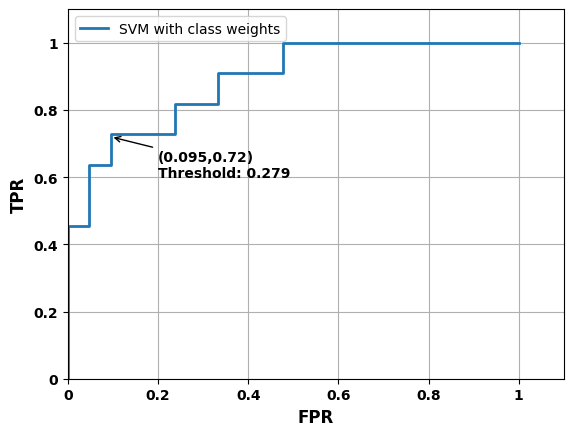

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve
from sklearn.metrics import make_scorer, f1_score, classification_report

X = np.empty((0,4))
Y = np.empty((0,))
for seed in [13]:
  x,y =  get_feature_vector(seed,non_benefitting_clients[seed],df_cluster_4)
  X = np.concatenate((X,x))
  Y = np.concatenate((Y,y))

X_test = X
y_test = Y

# # Make predictions on the testing data
# y_pred = clf.predict(X_test)
# # Calculate and print the accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve
y_pred_prob_rf = clf_rf.predict_proba(X_test)
precision_rf, recall_rf, thresh1_rf = precision_recall_curve(y_test, y_pred_prob_rf[:,1])
# y_pred_prob_svm = clf_svm.predict_proba(X_test)
# precision_svm, recall_svm, thresh1_svm = precision_recall_curve(y_test, y_pred_prob_svm[:,1])
fpr, tpr, thresh2 = roc_curve(y_test, y_pred_prob_rf[:,1])
print("roc-pr: ", auc(recall_rf,precision_rf))
# print("svm (pr): ", auc(recall_svm,precision_svm))

print("roc-auc : ",roc_auc_score(y_test, y_pred_prob_rf[:,1]))
# print("roc-auc (svm): ",roc_auc_score(y_test, y_pred_prob_svm[:,1]))
fig, ax = plt.subplots()

# Plot your data
ax.plot(fpr,tpr,linewidth =2)
# ax.plot(recall_rf, precision_rf,linewidth =2)
plt.ion()
# Customize the x-axis tick labels
ax.set_xticks([0,0.2,0.4,0.6,0.8,1])
ax.set_xticklabels([str(i) for i in [0,0.2,0.4,0.6,0.8,1]], fontsize=10, fontweight='bold')
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax.set_yticklabels([str(i) for i in [0,0.2,0.4,0.6,0.8,1]], fontsize=10, fontweight='bold')

# Customize the x-axis label
# ax.set_ylabel('Precision TP/(TP + FP)', fontsize=12, fontweight='bold')
# ax.set_xlabel('Recall TP/(TP + FN)', fontsize=12, fontweight='bold')

ax.set_xlabel('FPR', fontsize=12, fontweight='bold')
ax.set_ylabel('TPR', fontsize=12, fontweight='bold')

ax.grid()
ax.set_xlim([0,1.1])
ax.set_ylim([0,1.1])
# ax.title('Random')

# bagging with undersmampling: rev this->(0.6428,.8181), 0.38625

# rf with class weights: (0.82,0.82,) 0.448

# ax.annotate('(0.72,0.8)\nThreshold: 0.279', xy=((.72,0.8)), xytext=(0.78,.94),
#             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10, fontweight='bold')


ax.annotate('(0.095,0.72)\nThreshold: 0.279', xy=((0.095,0.72)), xytext=(0.2,0.6),
            arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10, fontweight='bold')
# Show the plot
# ax.legend(['Random forest with class weights'],loc='upper left')
ax.legend(['SVM with class weights'],loc='upper left')
plt.show(block=True)


# plt.figure()

# plt.plot(precision, recall)
# plt.xlabel('Precision TP/(TP + FP)')
# plt.ylabel('Recall TP/(TP + FN)')

# plt.figure()
# plt.plot(tpr, fpr)
# plt.xlabel('TPR')
# plt.ylabel('FPR')

In [ ]:
thresh1_rf

thresh2

array([1.68188311, 0.68188311, 0.45370932, 0.41774884, 0.37255356,
       0.32263905, 0.27930235, 0.23830166, 0.22530762, 0.17167187,
       0.14525428, 0.13659469, 0.12644911, 0.05850577])

In [ ]:
recall_rf

fpr

array([0.        , 0.        , 0.        , 0.04761905, 0.04761905,
       0.0952381 , 0.0952381 , 0.23809524, 0.23809524, 0.33333333,
       0.33333333, 0.47619048, 0.47619048, 1.        ])

In [ ]:
precision_rf
tpr

array([0.        , 0.09090909, 0.45454545, 0.45454545, 0.63636364,
       0.63636364, 0.72727273, 0.72727273, 0.81818182, 0.81818182,
       0.90909091, 0.90909091, 1.        , 1.        ])

In [ ]:
t = .2793
y_pred_prob = clf_rf.predict_proba(X_test)[:,1]
y_pred_prob[y_pred_prob>=t] = 1
y_pred_prob[y_pred_prob<t] = 0
y_pred_prob
print(classification_report(y_test, y_pred_prob))

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88        21
         1.0       0.80      0.73      0.76        11

    accuracy                           0.84        32
   macro avg       0.83      0.82      0.82        32
weighted avg       0.84      0.84      0.84        32



In [ ]:
# , balanced_accuracy_score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test,y_pred_prob)

0.8160173160173161

In [ ]:
# Define your two vectors (ground truth and predicted)
ground_truth = y_test
predicted =    y_pred_prob

# Initialize variables for TP, FP, TN, FN
tp = fp = tn = fn = 0

# Calculate TP, FP, TN, FN
for actual, pred in zip(ground_truth, predicted):
    if actual == 1 and pred == 1:
        tp += 1
    elif actual == 0 and pred == 1:
        fp += 1
    elif actual == 0 and pred == 0:
        tn += 1
    elif actual == 1 and pred == 0:
        fn += 1

# Print the metrics
print("True Positives (TP):", tp)
print("False Positives (FP):", fp)
print("True Negatives (TN):", tn)
print("False Negatives (FN):", fn)

# Calculate other metrics like accuracy, precision, recall, etc. if needed
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


True Positives (TP): 8
False Positives (FP): 2
True Negatives (TN): 19
False Negatives (FN): 3
Accuracy: 0.84375
Precision: 0.8
Recall: 0.7272727272727273
F1 Score: 0.761904761904762


Decision Tree


In [ ]:
# from sklearn.tree import DecisionTreeClassifier, export_graphviz
# from sklearn.metrics import accuracy_score

# data = df_k_means.values[:,1:-2]
# mean_vector = np.mean(data, axis=(0), keepdims=True)
# std_vector = np.mean(np.square(data-mean_vector), axis=(0), keepdims=True)

In [ ]:
# X_train = (data-mean_vector)/std_vector
# y_train = df_k_means['benefit'].values

# y_pred_dt = dt_classifier.predict(X_train)

In [ ]:
# {i:y_pred_dt[i] for i in range(len(y_pred_dt))}

In [ ]:
# accuracy_score(y_train, y_pred_dt)

In [ ]:
# from sklearn.tree import DecisionTreeClassifier, export_graphviz
# from sklearn.metrics import accuracy_score

# data = df_k_means.values[:,1:-2]
# mean_vector = np.mean(data, axis=(0), keepdims=True)
# std_vector = np.mean(np.square(data-mean_vector), axis=(0), keepdims=True)

# # Train Decision Tree model
# dt_classifier = DecisionTreeClassifier(random_state=0)

# X_train = (data-mean_vector)/std_vector
# y_train = df_k_means['benefit'].values

# dt_classifier.fit(X_train, y_train)
# y_pred_dt = dt_classifier.predict(X_train)

# # Evaluate Decision Tree model
# accuracy_dt = accuracy_score(y_train, y_pred_dt)
# print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

# import graphviz
# feature_names = df_k_means.columns[1:-2].tolist() #+ ['avg_'+i for i in df_k_means.columns[1:-2]]
# # Visualize the Decision Tree
# dot_data = export_graphviz(
#     dt_classifier,
#     out_file=None,
#     feature_names=feature_names ,
#     class_names=np.unique(y_train).astype(str),
#     filled=True,
#     rounded=True,
#     special_characters=True
# )

# graph = graphviz.Source(dot_data)
# graph.render("decision_tree")  # This will save the visualization as a file named "decision_tree.pdf"
# graph.view("decision_tree")

# PCA

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import plotly.graph_objects as go

# Sample data (replace this with your actual data)
data = X  # 100 samples, 3 features
num_clients = 32

# Initialize the PCA object with the desired number of components (n_components)
pca = PCA(n_components=3)

# Fit the PCA model to your data and transform it to the lower-dimensional space
data_transformed = pca.fit_transform(data)

# Create an interactive 3D scatter plot to visualize the lower-dimensional data
fig = go.Figure(data=go.Scatter3d(
    x=[],
    y=[],
    z=[],
    mode='markers',
    marker=dict(
        size=5,
        color=data_transformed[:, 2],  # Color the markers based on the third component
        colorscale='Viridis',          # Choose a colorscale
        opacity=0.8
    )
))

fig.update_layout(
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3',
    ),
    title='Interactive 3D PCA Visualization'
)

# Function to dynamically add points to the plot with specified color
def add_data_point(x, y, z, color):
    # Create a new trace with the new data point and specified color
    new_trace = go.Scatter3d(
        x=[x],
        y=[y],
        z=[z],
        mode='markers',
        marker=dict(
            size=5,
            color=color,       # Set the color for the new data point
            opacity=0.8
        )
    )
    # Add the new trace to the existing figure data
    fig.add_trace(new_trace)

nb = non_benefitting_clients[2]
for i in range(num_clients):
  if i not in nb:
      add_data_point(data_transformed[i, 0], data_transformed[i, 1],data_transformed[i, 2],'blue')
for i in nb:
  add_data_point(data_transformed[i, 0], data_transformed[i, 1],data_transformed[i, 2],'red')


# Update the plot with the new data point
fig.show()
# fig.xlabel('as')


(array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ]),
 [Text(0, -2.0, '−2.0'),
  Text(0, -1.5, '−1.5'),
  Text(0, -1.0, '−1.0'),
  Text(0, -0.5, '−0.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0')])

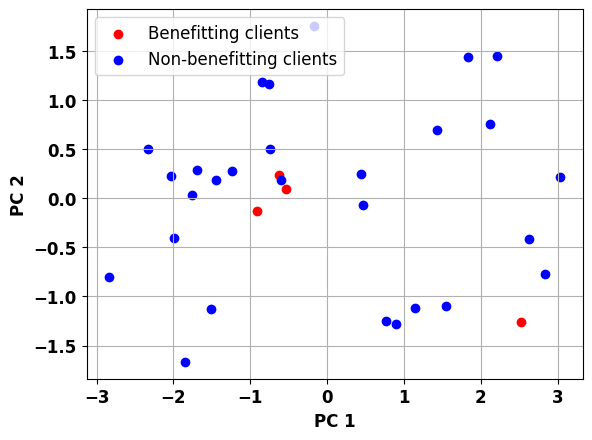

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import plotly.graph_objects as go

# Sample data (replace this with your actual data)
data = X # 100 samples, 3 features

# Initialize the PCA object with the desired number of components (n_components)
pca = PCA(n_components=2)

# Fit the PCA model to your data and transform it to the lower-dimensional space
data_transformed = pca.fit_transform(data)


for i in range(len(data_transformed)):
  if i in [0,2,9,14]:
    plt.scatter(data_transformed[i, 0], data_transformed[i, 1],c = 'red')
  else:
    plt.scatter(data_transformed[i, 0], data_transformed[i, 1],c = 'blue')

# for i in server_BA.network[c2].neighbours:
#   ax.scatter(data_transformed[i, 0], data_transformed[i, 1],data_transformed[i, 2],c = 'blue')

# ax.scatter(data_transformed[c1, 0], data_transformed[c1, 1],data_transformed[c1, 2],c = 'orange')
# ax.scatter(data_transformed[c2, 0], data_transformed[c2, 1],data_transformed[c2, 2],c = 'cyan')

# plt.xlim([-1,30])
plt.legend(["Benefitting clients","Non-benefitting clients"],fontsize = 12)
plt.grid()
plt.xlabel('PC 1',fontweight='bold',fontsize = 12)
plt.ylabel('PC 2',fontweight='bold',fontsize = 12)
# plt.xlim([-1,35])
plt.xticks(fontweight='bold',fontsize = 12)
plt.yticks(fontweight='bold',fontsize = 12)

# KS-TEST


In [ ]:
##KS-TEST


q = []
for i in np.argsort(MAPE2-MAPE):
  # for n in server_BA.network[i].neighbours:
  #   result = ks_2samp(df[df.id==i].load.values, df[df.id==n].load.values)
  #   print(result.statistic,end = "\n")
  q.append(np.mean([ks_2samp(df[df.id==i].load.values, df[df.id==n].load.values).statistic for n in server_BA.network[i].neighbours]))
  # print(sum(ks_2samp(df[df.id==i].load.values, df[df.id==n].load.values).statistic for n in server_BA.network[i].neighbours))
plt.stem(q);
custom_labels = np.argsort(MAPE2-MAPE);
plt.xticks([i for i in range(32)], custom_labels);

# Rotate x-axis labels by 90 degrees
plt.setp(plt.gca().xaxis.get_majorticklabels(), rotation=90);
plt.ylabel("KS_statistic")

NameError: ignored

# LEARNING CURVES

In [ ]:
max_len = [0,0,0,0]
for i in range(6):
  if len(FC[i].history['val_mae'])>max_len[0]:
    max_len[0] = len(FC[i].history['val_mae'])

  if len(BA[i].history['val_mae'])>max_len[1]:
    max_len[1] = len(BA[i].history['val_mae'])

  if len(WS[i].history['val_mae'])>max_len[2]:
    max_len[2] = len(WS[i].history['val_mae'])

  if len(R[i].history['val_mae'])>max_len[3]:
    max_len[3] = len(R[i].history['val_mae'])

In [ ]:
max_len

In [ ]:
## LEARNING CURVES
seed = 1
for server in [FC[seed],BA[seed],WS[seed],R[seed]]:
  plt.plot(server.history['val_mae']);


# plt.plot(FC[6].history['val_mae']);
plt.xlabel("Epoch", fontweight='bold',fontsize = 14);
plt.ylabel("Validation MAE", fontweight='bold',fontsize = 14);
# plt.xticks([i for i in range(35)]);
plt.xlim([-1,30])
plt.legend(["Fully Connected (Star)","Wattz-Strogatz","Barabasi-Albert","Ring"],fontsize = 12)
plt.grid()
plt.xlim([-1,35])
plt.xticks(fontweight='bold',fontsize = 12)
plt.yticks(fontweight='bold',fontsize = 12)

# FUNCTIONS

In [ ]:
def df_to_X_y(df,window,stride,n,mean_values,std_values):
  X = [];
  y = [];
  load = df.load.values
  input = df[['load','Weekday','Hour','AVG4D','TempCluster']].values
  # input = df[['load','Week','Weekday','Hour','temperature','humidity']].values
  for i in range(0,len(df)-window-1,stride):
    X_data = input[i:i+window]
    y_data = load[i+window]
    X.append(X_data)
    y.append(y_data)

  if n=='min_max':
    if len(mean_values)==0:
      min_values = np.min(X, axis=(0, 1), keepdims=True)
      max_values = np.max(X, axis=(0, 1), keepdims=True)
    else:
      min_values = mean_values
      max_values = std_values

    X = (X - min_values) / (max_values - min_values)

  elif n == 'log_gaussian':
    # Step 1: Log-normalization
    arr_log = np.log(np.array(X)+K.epsilon())

    # Step 2: Gaussian normalization (per column)
    if len(mean_values)==0:
      mean_values = np.mean(arr_log, axis=(0,1), keepdims=True)
      std_values = np.std(arr_log, axis=(0,1), keepdims=True)

    X = (arr_log - mean_values) / K.clip(std_values, K.epsilon(),None)

  return np.array(X),np.array(y)


In [ ]:
# Constructing the classes
import tensorflow as tf
import numpy as np

class Client:
    def __init__(self, id, neighbours, model, x_data, y_data):
        self.id = id
        self.neighbours = neighbours
        self.model = model
        # self.x_data = x_data
        # self.y_data = y_data
        x_train_val, x_test, y_train_val, y_test = train_test_split(x_data, y_data, test_size=0.085, shuffle=False,random_state=0)
        x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.1, shuffle=False,random_state=0)
        self.x_train = x_train
        self.x_val = x_val
        self.x_test = x_test
        self.y_train = y_train
        self.y_val = y_val
        self.y_test = y_test
        self.history = {}
        self.val_loss_list = [1000] #arbitrary large initial loss
        self.new_weights = []
        self.run_time = 0

        self.model_weights_list = []

    def add_neighbour(self,id):
      self.neighbours.append(id)

    def remove_neighbour(self,node):
      self.neighbours.remove(node)


class Server:
    def __init__(self, network, accuracy):
        self.network = network
        self.val_loss_list = [1000000] # arbitrary large loss
        self.history = {'mae': [], 'rmse': [], 'mape': [], 'val_mae':[],'val_rmse':[],'val_mape':[]}
        self.run_time = 0 #in mins

    def add_client(self,client):
      self.network[client.id] = client

    def aggregation(self,rounds,batch_size,epochs,patience,val_type):
      for i in range(rounds):
        print("ROUND: ",i)
        for client in self.network:
          print("client: ",client.id)
          history = client.model.fit(client.x_train, client.y_train, batch_size = batch_size, epochs=epochs,validation_data = (client.x_val,client.y_val), verbose = 0).history
          for key, value in history.items():
            client.history[key] = client.history.get(key, []) + value

        for client in self.network:
          d = len(client.x_train)
          total_size = d + sum(len(self.network[n].x_train) for n in client.neighbours)
          client.new_weights = [i*d/total_size for i in client.model.get_weights()]
          num_layers = len(client.new_weights)

          for n in client.neighbours:
            neighbour = self.network[n]
            neighbour_size = len(neighbour.x_train)
            neighbour_weights = neighbour.model.get_weights()
            for j in range(num_layers):
               client.new_weights[j] =  client.new_weights[j] + neighbour_weights[j]*neighbour_size/total_size


        for client in self.network:
          client.model.set_weights(client.new_weights)

        if val_type=='overall':
          # for overall average val_loss earlystop
          a = [client.model.evaluate(client.x_val,client.y_val,verbose = 0)[0] for client in self.network]
          val_loss = np.array(a).mean()
          self.history['val_mape'].append(np.mean([client.model.evaluate(client.x_val,client.y_val,verbose = 0)[2] for client in self.network]))
          self.history['val_rmse'].append(np.mean([client.model.evaluate(client.x_val,client.y_val,verbose = 0)[1] for client in self.network]))
          self.history['val_mae'].append(val_loss)

          self.history['mape'].append(np.mean([client.model.evaluate(client.x_train,client.y_train,verbose = 0)[2] for client in self.network]))
          self.history['rmse'].append(np.mean([client.model.evaluate(client.x_train,client.y_train,verbose = 0)[1] for client in self.network]))
          self.history['mae'].append(np.mean([client.model.evaluate(client.x_train,client.y_train,verbose = 0)[0] for client in self.network]))
          if val_loss>=self.val_loss_list[0]:
            self.val_loss_list.append(val_loss)
            for client in self.network:
              client.model_weights_list.append(client.model.get_weights())
          else:
            self.val_loss_list = [val_loss]
            for client in self.network:
              client.model_weights_list = [client.model.get_weights()]
          print("val_loss_list: ", self.val_loss_list)
          print("val_mape: ", self.history['val_mape'])

          if len(self.val_loss_list)==patience+1:
            for client in self.network:
              client.model.set_weights(client.model_weights_list[0])
            return



        elif val_type == 'individual':
          # for individual val_loss earlystop
          self.history['val_mape'].append(np.mean([client.model.evaluate(client.x_val,client.y_val,verbose = 0)[2] for client in self.network]))
          self.history['val_rmse'].append(np.mean([client.model.evaluate(client.x_val,client.y_val,verbose = 0)[1] for client in self.network]))
          self.history['val_mae'].append(np.mean([client.model.evaluate(client.x_val,client.y_val,verbose = 0)[0] for client in self.network]))

          self.history['mape'].append(np.mean([client.model.evaluate(client.x_train,client.y_train,verbose = 0)[2] for client in self.network]))
          self.history['rmse'].append(np.mean([client.model.evaluate(client.x_train,client.y_train,verbose = 0)[1] for client in self.network]))
          self.history['mae'].append(np.mean([client.model.evaluate(client.x_train,client.y_train,verbose = 0)[0] for client in self.network]))

          for client in self.network:
            val_loss = client.model.evaluate(client.x_val,client.y_val,batch_size = len(client.x_val),verbose = 0)[0]
            if val_loss>=client.val_loss_list[0]:
              client.val_loss_list.append(val_loss)
              client.model_weights_list.append(client.model.get_weights())
            else:
              client.val_loss_list = [val_loss]
              client.model_weights_list = [client.model.get_weights()]
            print("val_loss_list: ", client.val_loss_list)
            print("val_mape: ", client.history['val_mean_absolute_percentage_error'][-1])

            if len(client.val_loss_list)==patience+1:
              print("client {}: early_stop".format(client.id))
              client.model.set_weights(client.model_weights_list[0])
              return

        # filepath = '/content/drive/MyDrive/Colab Notebooks/Thesis/UK power networks dataset/server_lossMAE_c32_ba_graph_esO_none_b128_' + str(i)
        # with open(filepath, 'wb') as file:
        #     pickle.dump(self, file)

# Plotting Load Profile

In [ ]:
# t1 = datetime(year = 2013,month = 7, day = 1)
# t2 = datetime(year = 2013,month = 7, day = 3)
# x = df[(df.id==0)&(df.DateTime>=t1)&(df.DateTime<=t2)]

# plt.figure(figsize=(14, 4))
# plt.plot(x.DateTime,x.load)
# plt.grid()
# plt.xlabel('DateTime', fontsize=14)
# plt.ylabel('Load (KWh)', fontsize=14)


# ROC and PR curves

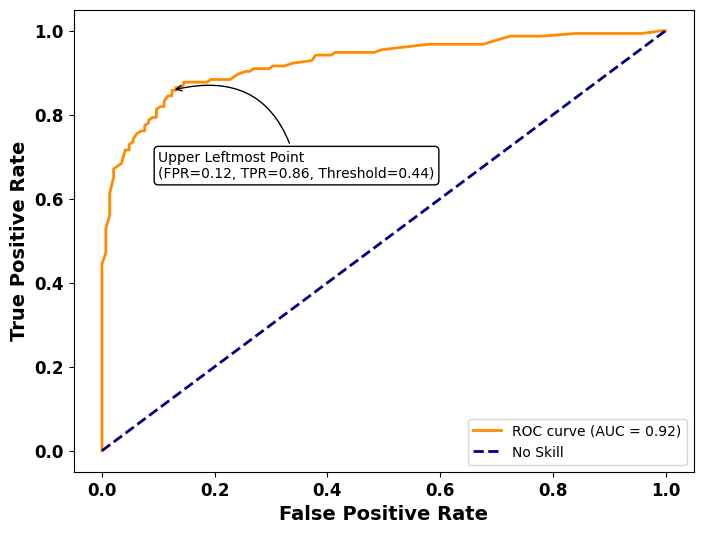

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset and split it into training and testing sets
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier (Random Forest in this example, replace with your actual model)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities on the test set
y_scores = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Find the index of the leftmost point on the ROC curve
idx_leftmost = np.argmax(tpr - fpr)

# Extract the corresponding threshold
leftmost_threshold = thresholds[idx_leftmost]

# Plot ROC curve and "No Skill" curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='No Skill')

# Annotate the leftmost point on the ROC curve with x and y coordinates and the threshold
plt.annotate('Upper Leftmost Point\n(FPR={:.2f}, TPR={:.2f}, Threshold={:.2f})'.format(fpr[idx_leftmost], tpr[idx_leftmost], leftmost_threshold),
             xy=(fpr[idx_leftmost], tpr[idx_leftmost]), xytext=(0.1, 0.65),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5'),
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

# Customize labels and tick labels
plt.xlabel('False Positive Rate', fontweight='bold',fontsize = 14)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize = 14)
plt.xticks(fontweight='bold',fontsize = 12)
plt.yticks(fontweight='bold',fontsize = 12)

# Add legend
plt.legend(loc='lower right')

# Display the plot
plt.show()


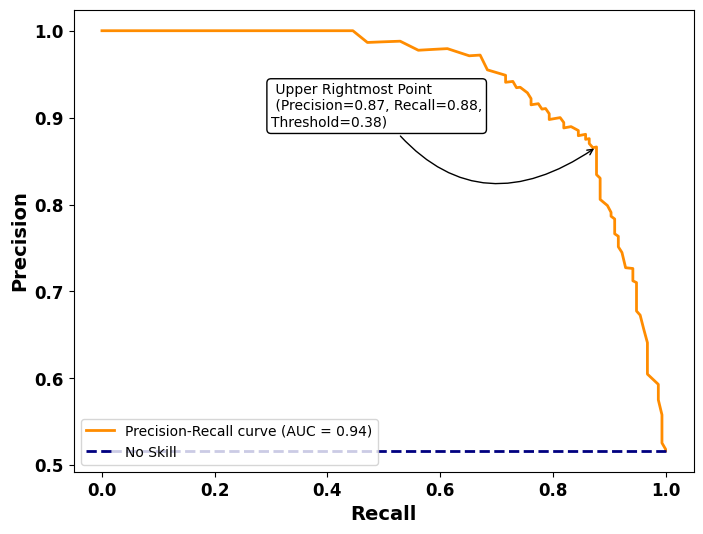

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset and split it into training and testing sets
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier (Random Forest in this example, replace with your actual model)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict probabilities on the test set
y_scores = clf.predict_proba(X_test)[:, 1]

# Create a "No Skill" classifier by predicting a constant probability (e.g., 0.5)
no_skill_classifier = np.full_like(y_scores, 0.5)

# Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

# Compute Precision-Recall curve for the "No Skill" classifier
# precision_no_skill, recall_no_skill, _ = precision_recall_curve(y_test, no_skill_classifier)
recall_no_skill = recall
precision_no_skill = np.ones((len(recall)))*len(y_test[y_test==1])/len(y_test)



pr_auc_no_skill = auc(recall_no_skill, precision_no_skill)

# Find the index of the leftmost point on the Precision-Recall curve
idx_leftmost = np.argmax(precision + recall)

# Extract the corresponding threshold for the leftmost point
leftmost_threshold = thresholds[idx_leftmost]

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve (AUC = {:.2f})'.format(pr_auc))
plt.plot(recall_no_skill, precision_no_skill, color='navy', lw=2, linestyle='--', label='No Skill ')

# Annotate the leftmost point on the Precision-Recall curve with precision, recall, and threshold
plt.annotate(' Upper Rightmost Point\n (Precision={:.2f}, Recall={:.2f},\nThreshold={:.2f})'.format(precision[idx_leftmost], recall[idx_leftmost], leftmost_threshold),
             xy=(recall[idx_leftmost], precision[idx_leftmost]), xytext=(0.3, 0.89),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5'),
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

# Customize labels and tick labels
plt.xlabel('Recall', fontweight='bold',fontsize = 14)
plt.ylabel('Precision', fontweight='bold',fontsize = 14)
plt.xticks(fontweight='bold',fontsize = 12)
plt.yticks(fontweight='bold',fontsize = 12)

# Add legend
plt.legend(loc='lower left')

# Display the plot
plt.show()
